<a href="https://colab.research.google.com/github/rahiakela/deep_learning_for_vision_systems/blob/4-structuring-deep-learning-projects-and-hyperparameters-tuning/1_build_train_evaluate_simple_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build, train and evaluate a simple network

Before we move on to the hyperparameter tuning section, let’s run a quick experiment to see how we split the data, build, train and visualize the model results.

In this exercise we will do the following:
* Create toy data for our experiment
* Split the data into 80% training and 20% testing datasets
* Build the MLP neural network
* Train the model
* Evaluate the model
* Visualize the results

## Setup

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt

## Data preparation

In [3]:
# generate a toy dataset of only two features and four label classes
X, y  = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=2, random_state=42)
X[:10]

array([[-8.27175201,  6.80571297],
       [-5.39543645, -6.28152443],
       [-5.76297337, -6.72809881],
       [ 3.72115704,  0.27348095],
       [ 4.12069613, -1.03311622],
       [-6.76560094, -6.34292504],
       [ 5.40027454,  3.19434117],
       [-5.04697184, -6.18713264],
       [-6.43179892, -4.15182873],
       [ 7.05289677,  0.33929834]])

In [4]:
y[:10]

array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1])

In [5]:
# one-hot encode for output variable
y = to_categorical(y)
y[:10]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [7]:
# split into 80% training data and 20% test data 
# note that we did not create a validation dataset in this example for simplicity
n_train = 200
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape) 

(200, 2) (800, 2)


## baseline model architecture

In [9]:
# develop the baseline model architecture
# here we are building a very simple, two-layer network
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(4, activation='softmax'))  # four hidden units because we have 4 label classes

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 104       
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [0]:
# train the model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=1)

In [11]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print(f'Train: {str(train_acc)}, Test: {str(test_acc)}')

Train: 0.99, Test: 0.955


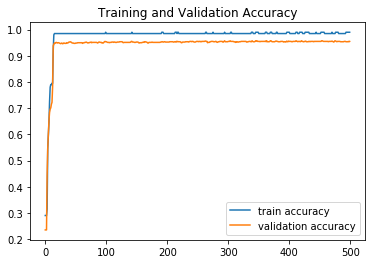

In [15]:
# plot learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

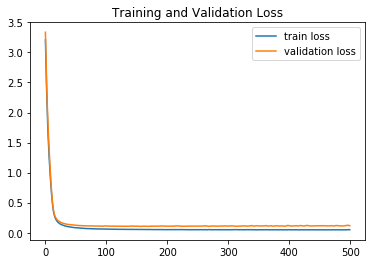

In [16]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Network analysis

Looking at the above learning curve, you can see that both train and test curves are fitting the data with a similar behavior. This means that the network is not overfitting. 

The network would have been overfitting if the train curve is doing well but the test curve is not. But in this case the network is not overfitting. Could it be underfitting? Maybe. 82% on a very simple dataset like this is considered a poor performance. 

To improve the performance of this neural network, I would try to build a more complex network and experiment with other underfitting techniques.